In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [19]:
football_teams = pd.read_csv('Football teams.csv')
football_teams.info()
# данные по клубам за сезон 2020-2021 в национальных лигах

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Team          98 non-null     object 
 1   Tournament    98 non-null     object 
 2   Goals         98 non-null     int64  
 3   Shots pg      98 non-null     float64
 4   yellow_cards  98 non-null     int64  
 5   red_cards     98 non-null     int64  
 6   Possession%   98 non-null     float64
 7   Pass%         98 non-null     float64
 8   AerialsWon    98 non-null     float64
 9   Rating        98 non-null     float64
dtypes: float64(5), int64(3), object(2)
memory usage: 7.8+ KB


In [13]:
football_teams

,Team,Tournament,Goals,Shots pg,yellow_cards,red_cards,Possession%,Pass%,AerialsWon,Rating
0,Manchester City,Premier League,83,15.8,46,2,60.8,89.4,12.8,7.01
1,Bayern Munich,Bundesliga,99,17.1,44,3,58.1,85.5,12.9,6.95
2,Paris Saint-Germain,Ligue 1,86,15.0,73,7,60.1,89.5,9.5,6.88
3,Barcelona,LaLiga,85,15.3,68,2,62.4,89.7,10.6,6.87
4,Real Madrid,LaLiga,67,14.4,57,2,57.7,87.7,11.8,6.86
...,...,...,...,...,...,...,...,...,...,...
93,Sheffield United,Premier League,20,8.5,73,3,43.0,76.9,19.1,6.46
94,Crotone,Serie A,45,9.5,85,4,47.2,80.4,12.7,6.43
95,Benevento,Serie A,40,11.0,90,5,44.2,77.7,13.4,6.43
96,Dijon,Ligue 1,25,9.2,75,5,46.9,80.0,14.3,6.42


In [14]:
football_teams.isnull().sum()

Team            0
Tournament      0
Goals           0
Shots pg        0
yellow_cards    0
red_cards       0
Possession%     0
Pass%           0
AerialsWon      0
Rating          0
dtype: int64

In [15]:
football_teams.groupby('Tournament')['Team'].nunique()

Tournament
Bundesliga        18
LaLiga            20
Ligue 1           20
Premier League    20
Serie A           20
Name: Team, dtype: int64

Text(0.5, 1.0, 'Best score teams (top 10 Teams)')

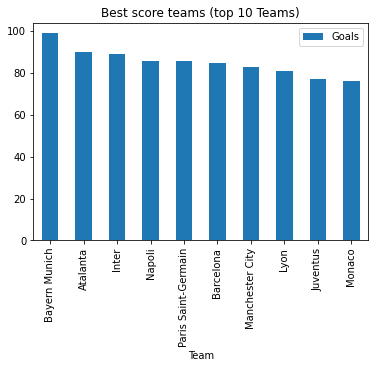

In [48]:
football_teams[['Team','Goals']].sort_values(by = 'Goals',ascending = False)[:10].plot(kind = 'bar',x = 'Team',y = "Goals")
plt.title("Best score teams (top 10 Teams)")
# Видно, что Бавария Мюнхен самая забивная команда (большинство из этих команд закончили чемпионат в топ-4).
# итог - больше голов - выше итоговое место

Text(0.5, 1.0, 'Worst score teams (top 10 Teams)')

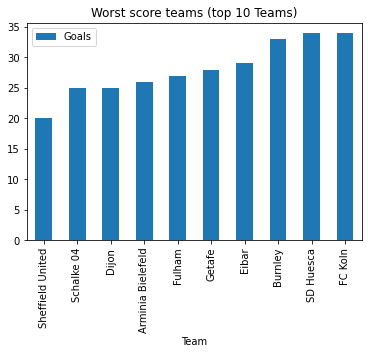

In [49]:
football_teams[['Team','Goals']].sort_values(by = 'Goals')[:10].plot(kind = 'bar',x = 'Team',y = "Goals")
plt.title("Worst score teams (top 10 Teams)")
# Видно, что Шеффилд Юнайтед самая худшая команда по голам (большинство из этих команд покинули чемпионат).
# итог - меньше голов - ниже итоговое место

<AxesSubplot:xlabel='Tournament', ylabel='Possession%'>

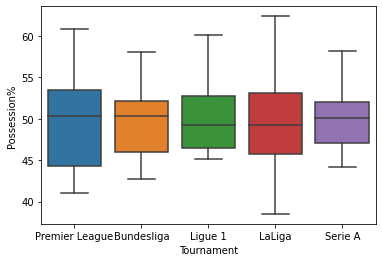

In [64]:
tournament_check = football_teams['Tournament'].value_counts().sort_values(ascending = False).head(10).index.values
sns.boxplot(x = "Tournament", y = "Possession%", 
            data = football_teams[football_teams['Tournament'].isin(tournament_check)])
# наибольшее макс значение по % владения мячом у команды из Испании, а наименьшее в Германии и Италии,
# верхний квартиль наибольший у команд из Англии и Испании,а наименьший из Германии и Италии,
# медиана около 50% в Англии, Германии и Италии, во Франции и Испании ниже,
# нижний квартиль наибольший в Италии, а наименьший в Англии,
# наибольшее мин значение по % владения мячом у команды из Испании, а наименьшее в Италии,
# выбросов нет
# Вывод - В Англии и Франции распредление команд по владению мячом более широкое, чем в остальных лигах.
# Во Франции и Испании медиана ближе к нижней границе, в отличие от остальных стран.

<AxesSubplot:xlabel='Tournament', ylabel='Pass%'>

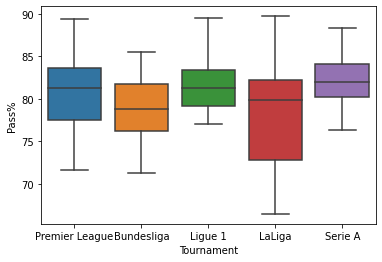

In [65]:
tournament_check = football_teams['Tournament'].value_counts().sort_values(ascending=False).head(10).index.values
sns.boxplot(x = "Tournament", y = "Pass%", 
            data = football_teams[football_teams['Tournament'].isin(tournament_check)])
# наибольшее макс значение по % владения мячом у команд из Испании, Франции и Англии, а наименьшее в Германии,
# верхний квартиль наибольший у команд из Испании,а наименьший из Германии,
# медиана выше 80% в Англии, Испании и Италии, в Германии и Франции ниже,
# нижний квартиль наибольший в Италии, а наименьший в Испании,
# наибольшее мин значение по % владения мячом у команды из Испании, а наименьшее в Италии,
# выбросов нет
# Вывод - В Англии и Испании распредление команд по владению мячом более широкое, чем в остальных лигах.
# В Германии и Италии медиана ближе к нижней границе, в отличие от остальных стран.

# Можно сказать, что наблюдается высокая прямая корреляция между % владения мячом и % тоности передач (чем выше % владения, тем выше % точности передач).

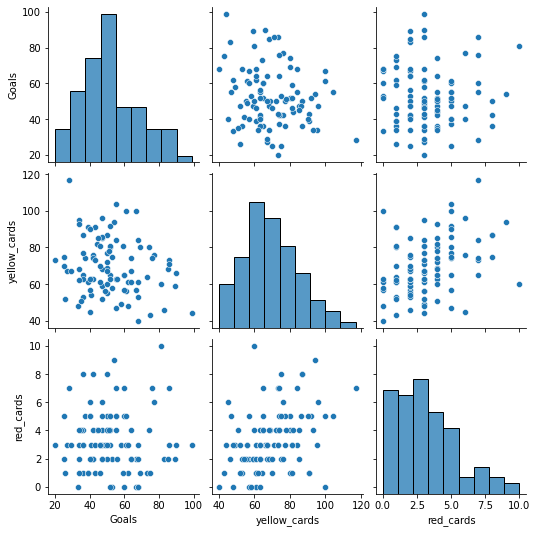

In [68]:
sns.pairplot(football_teams[['Goals', 'yellow_cards', 'red_cards']])
# В общем видно, чем меньше голов, тем больше желтых и красных карточек.

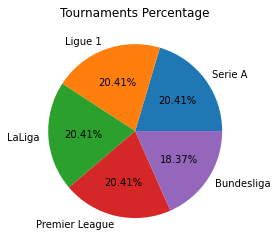

In [85]:
plt.pie(football_teams['Tournament'].value_counts().values, 
        labels = football_teams['Tournament'].value_counts().index, autopct='%0.2f%%')
plt.title('Tournaments Percentage')
plt.show()
# Показано, что в Бундеслиге вместо 20 играет 18 команд.

<Figure size 432x288 with 0 Axes>

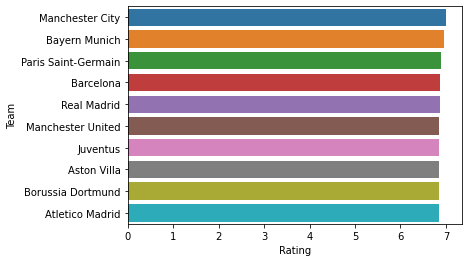

<Figure size 432x288 with 0 Axes>

In [78]:
sns.barplot(y = (football_teams.sort_values('Rating',ascending = False))['Team'].head(10),
            x = (football_teams.sort_values('Rating',ascending = False)['Rating'].head(10)))
plt.figure()
# Показаны лучшие команды по рейтингу.

<Figure size 432x288 with 0 Axes>

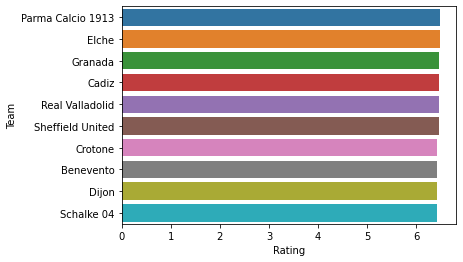

<Figure size 432x288 with 0 Axes>

In [79]:
sns.barplot(y = (football_teams.sort_values('Rating',ascending = False))['Team'].tail(10),
            x = (football_teams.sort_values('Rating',ascending = False)['Rating'].tail(10)))
plt.figure()
# Показаны худшие команды по рейтингу.

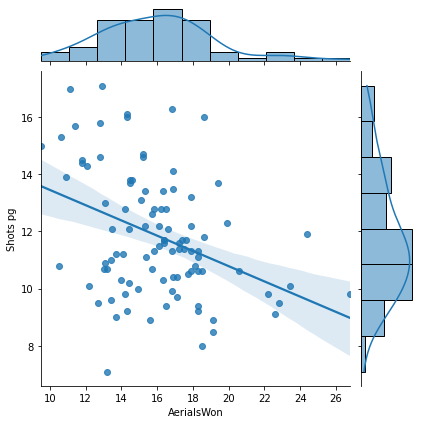

In [84]:
sns.jointplot(x = 'Shots pg', y = 'AerialsWon', data = football_teams, kind='reg')
# Показано связь между выигранными единабортсвами и ударами за игру.